# Neural Networks Lab

In this lab, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

In [ ]:
#no matter the function, what inputs/outputs, a neural networks can very closely aproximate the output values f(x)

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

In [ ]:
#just because we can mimick any function, doesn't mean it is easy to identify it or how to do it. 
#1st: it is also only an approximation!
#2nd: has to be continous, can't have big jumps, etc.

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on the page to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

In [ ]:
#w is the weight, b is the bias, the interplay of the two determines the 'step'
#in general b will shift the curve left & right whereas w will shift the slope
#s =  −b / w    the step is the negative  proportion of bias to weight. It is where the neuron is 'activated'

**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and why are we working with this one instead of $f(x)$?

In [9]:
#because it is a close approximation
import numpy as np
import matplotlib.pyplot as plt

In [11]:
nums = []
for x in np.linspace(0.001, 1.0, 1000):
    p = 0.2 + (0.4 * (x**2)) + (0.3 *(x) * np.sin(15 * x)) + (0.05 * np.cos(50*x))
    nums.append(p)

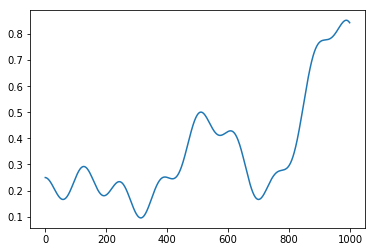

In [12]:
plt.plot(np.arange(1000), nums)

In [ ]:

0.2+0.4x2+0.3xsin(15x)+0.05cos(50x)

**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score.

In [ ]:
#0.38 deviation - -1.4, -1.3, -0.4, -1, 1.2

**Problem 6**: Build the neural network from your work in Problem 5 here.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?
* In order to create step functions between 0 and 0.2, 0.2 and 0.4, etc., what does this suggest about the activation function in these neurons? Note that these activation functions will be different, but related.
* What do the values of $h_i$ represent?

Check out the Neural Networks I notes for an implementation in NumPy; you should be able to use this as a starting point for your model.

In [13]:
def sigmoid_activation(Z):
    if Z > 6:
        return(1)
    if Z < -6:
        return(0)
    # So that our function doesn't need to compute the sigmoid 
    # for extreme values, which is computationally difficult.
    return(1/(1+np.exp(-Z)))

In [14]:
def identity(x):
    return(x)

In [18]:
def bias(s, w=500):
    return (-w * s)

In [23]:
steps = [0,.2,.2,.4,.4,.6,.6,.8,.8,1]
weights = np.array(1000 * 10)
bias_h = np.array([bias(s) for s in steps])
bias_output = 0
weights_output = np.array([-1.2, 1.2, -1.6, 1.6, -.3, .3, -1, 1, 1, -1])

In [21]:
def netword(x, output=identity):
    input_val = x
    h1 = input_val * weights  + bias_h
    activation = np.array([sigmoid_activation(z) for Z in Z_h])
    
    Z_output = np.sum(activation_h1 * weights_output) + bias_output
    activation_output = output(Z_output)
    return activation_output

**Problem 7**: Once you've built the neural network, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and use the `pynverse` [library](https://pypi.python.org/pypi/pynverse) to manually estimate the performance of your neural network using mean squared error.

Recall that mean squared error is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.

In [24]:
netword(np.linspace(0,1,1000))
#disaster

ValueError: operands could not be broadcast together with shapes (1000,) (10,) 

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?